In [342]:
from os.path import join
from bokeh.io import show, output_notebook, push_notebook, output_file
from bokeh.application.handlers import FunctionHandler
from bokeh.application import Application
from bokeh.colors import RGB
from dataset_handler.dataset_handler import DatasetHandler

from itertools import combinations
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
output_notebook()

Loading BokehJS ...

In [3]:
colors_list = [RGB(252,141,89), RGB(255,255,191), RGB(145,191,219)]

In [241]:
def get_redundant_pairs(df):
    '''Get diagonal and lower triangular pairs of correlation matrix'''
    pairs_to_drop = set()
    cols = df.columns
    for i in range(0, df.shape[1]):
        for j in range(0, i+1):
            pairs_to_drop.add((cols[i], cols[j]))
    return pairs_to_drop

def get_top_abs_correlations(df, n=5):
    au_corr = df.corr().abs().unstack()
    labels_to_drop = get_redundant_pairs(df)
    au_corr = au_corr.drop(labels=labels_to_drop).sort_values(ascending=False)
    return au_corr[0:n]

# Perception results

In [299]:
csv_folder = '../data/surveys/csv_data'
csv_files = [join(csv_folder, 'perception_prior.csv'), join(csv_folder, 'perception_after.csv'),
             join(csv_folder, 'perception_diff.csv')]

In [300]:
data_handler_percep = DatasetHandler(csv_files, colors_list, ['ANT2', 'ANT4', 'ANI2', 'ANI3', 'ANI4', 'INT2', 'INT4', 'LIKE3', 'SAFE1', 'SAFE3'])
#data_handler = DatasetHandler(csv_files, colors_list)

In [301]:
# Set up an application
handler = FunctionHandler(data_handler_percep.modify_doc)
app = Application(handler)

In [302]:
show(app)

In [303]:
data = data_handler_percep.dataset[data_handler_percep.dataset["type"]==0]
data = data[data["group"]==2]['ANT4']
print(np.mean(data))
data = data_handler_percep.dataset[data_handler_percep.dataset["type"]==1]
data = data[data["group"]==2]['ANT4']
print(np.mean(data))

2.0
2.6666666666666665


In [304]:
data = data_handler_percep.dataset[data_handler_percep.dataset["type"]==0]
data = data[data["group"]==2]['ANI6']
print(np.mean(data))
data = data_handler_percep.dataset[data_handler_percep.dataset["type"]==1]
data = data[data["group"]==2]['ANI6']
print(np.mean(data))

2.5
3.1666666666666665


In [305]:
data = data_handler_percep.dataset[data_handler_percep.dataset["type"]==0]
data = data[data["group"]==3]['INT1']
print(np.mean(data))
data = data_handler_percep.dataset[data_handler_percep.dataset["type"]==1]
data = data[data["group"]==3]['INT1']
print(np.mean(data))

3.0
2.2857142857142856


In [307]:
data = data_handler_percep.dataset[data_handler_percep.dataset["type"]==0]
data = data[data["group"]==3]['INT4']
print(np.mean(data))
data = data_handler_percep.dataset[data_handler_percep.dataset["type"]==1]
data = data[data["group"]==3]['INT4']
print(np.mean(data))

2.857142857142857
2.0


In [308]:
data = data_handler_percep.dataset[data_handler_percep.dataset["type"]==1]
data = data[data["group"]==2].iloc[:, -24:]

In [309]:
print(np.argmin(data.mean()), np.min(data.mean()))
print(np.argmax(data.mean()), np.max(data.mean()))

ANI2 2.0
LIKE4 3.5


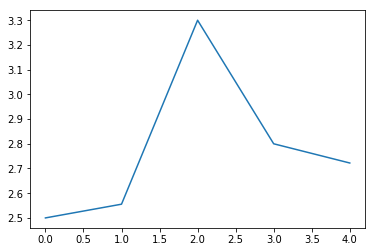

In [310]:
X = []
X.append(np.mean(data.mean()[:5]))
X.append(np.mean(data.mean()[5:11]))
X.append(np.mean(data.mean()[11:16]))
X.append(np.mean(data.mean()[16:21]))
X.append(np.mean(data.mean()[21:]))
plt.plot(X)

In [312]:
data = data_handler_percep.dataset[data_handler_percep.dataset["type"]==1]
data = data[data["group"]==3].iloc[:, -24:]

In [313]:
print(np.argmin(data.mean()), np.min(data.mean()))
print(np.argmax(data.mean()), np.max(data.mean()))

ANI4 1.7142857142857142
LIKE1 3.5714285714285716


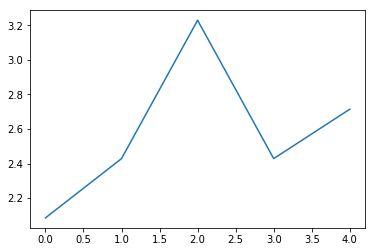

In [314]:
X = []
X.append(np.mean(data.mean()[:5]))
X.append(np.mean(data.mean()[5:11]))
X.append(np.mean(data.mean()[11:16]))
X.append(np.mean(data.mean()[16:21]))
X.append(np.mean(data.mean()[21:]))
plt.plot(X)

In [315]:
data = data_handler_percep.dataset[data_handler_percep.dataset["type"]==1]
data = data[data["group"]==2].iloc[:, -24:]

In [316]:
print("Top Absolute Correlations")
print(get_top_abs_correlations(data, 10))

Top Absolute Correlations
LIKE3  LIKE5    1.000000
INT2   INT4     1.000000
ANT4   ANI3     0.943242
ANI2   INT1     0.894427
LIKE4  INT1     0.894427
       INT2     0.894427
       INT4     0.894427
ANT3   ANT4     0.875000
ANT2   ANT4     0.869626
LIKE1  SAFE1    0.867722
dtype: float64


In [317]:
data = data_handler_percep.dataset[data_handler_percep.dataset["type"]==1]
data = data[data["group"]==3].iloc[:, -24:]

In [318]:
print("Top Absolute Correlations")
print(get_top_abs_correlations(data, 10))

Top Absolute Correlations
ANT2  LIKE2    1.000000
ANT3  SAFE1    0.954703
ANT4  SAFE1    0.935971
ANT1  ANT3     0.917249
ANT3  ANT4     0.887412
INT2  SAFE1    0.883883
      SAFE2    0.883883
ANT1  SAFE1    0.880705
INT1  INT5     0.872082
ANT4  INT2     0.867227
dtype: float64


In [331]:
data = data_handler_percep.dataset[data_handler_percep.dataset["type"]==1]
data = data[data["group"].isin([2,3])].iloc[:, -24:]

In [332]:
print("Top Absolute Correlations")
print(get_top_abs_correlations(data, 10))

Top Absolute Correlations
INT2   INT4     0.879599
ANT3   ANT4     0.824322
LIKE3  LIKE5    0.788663
LIKE4  LIKE5    0.767959
LIKE3  LIKE4    0.752420
ANT3   ANI4     0.746203
ANT4   ANI4     0.745665
LIKE2  LIKE3    0.741402
ANI1   LIKE1    0.717314
ANT2   ANT4     0.708371
dtype: float64


# Usability results

In [319]:
csv_folder = '../data/surveys/csv_data'
csv_files = [join(csv_folder, 'usability.csv')]

In [320]:
data_handler_use = DatasetHandler(csv_files, colors_list)

In [321]:
# Set up an application
handler = FunctionHandler(data_handler_use.modify_doc)
app = Application(handler)

In [322]:
show(app)

In [411]:
data = data_handler_use.dataset[data_handler_use.dataset["group"]==2].iloc[:,-10:]
odd_data = data.iloc[:,[0,2,4,6,8]] - 1
even_data = 5 - data.iloc[:,[1,3,5,7,9]]
data = pd.concat([odd_data, even_data], axis=1, sort=False)
data = data.sort_index(axis=1)

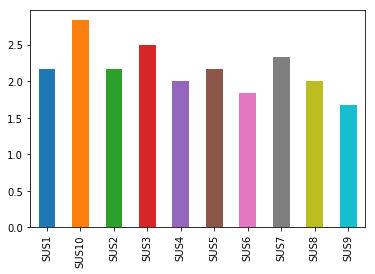

In [412]:
data.mean().plot(kind='bar')

In [413]:
print(np.argmin(data.mean()), np.min(data.mean()))
print(np.argmax(data.mean()), np.max(data.mean()))

SUS9 1.6666666666666667
SUS10 2.8333333333333335


In [414]:
data['SUS2'].mean()

2.1666666666666665

In [399]:
print("Top Absolute Correlations")
print(get_top_abs_correlations(data, 5))

Top Absolute Correlations
SUS4  SUS5    0.891133
      SUS7    0.891133
SUS6  SUS8    0.774597
SUS2  SUS5    0.752071
SUS5  SUS7    0.647059
dtype: float64


In [407]:
data = data_handler_use.dataset[data_handler_use.dataset["group"]==3].iloc[:,-10:]
odd_data = data.iloc[:,[0,2,4,6,8]] - 1
even_data = 5 - data.iloc[:,[1,3,5,7,9]]
data = pd.concat([odd_data, even_data], axis=1, sort=False)
data = data.sort_index(axis=1)

In [408]:
print(np.argmin(data.mean()), np.min(data.mean()))
print(np.argmax(data.mean()), np.max(data.mean()))

SUS7 1.0
SUS10 2.857142857142857


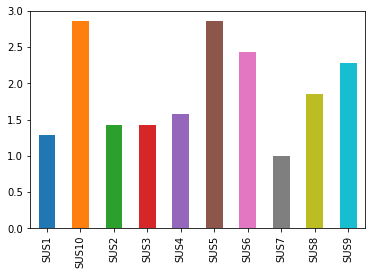

In [409]:
data.mean().plot(kind='bar')

In [410]:
data['SUS2'].mean()

1.4285714285714286

In [403]:
print("Top Absolute Correlations")
print(get_top_abs_correlations(data, 5))

Top Absolute Correlations
SUS3  SUS9    0.806747
SUS1  SUS8    0.806226
SUS2  SUS7    0.794050
SUS4  SUS7    0.763763
      SUS5    0.746816
dtype: float64


In [404]:
data = data_handler_use.dataset[data_handler_use.dataset["group"].isin([2,3])].iloc[:,-10:]
odd_data = data.iloc[:,[0,2,4,6,8]] - 1
even_data = 5 - data.iloc[:,[1,3,5,7,9]]
data = pd.concat([odd_data, even_data], axis=1, sort=False)

In [405]:
print("Top Absolute Correlations")
print(get_top_abs_correlations(data, 5))

Top Absolute Correlations
SUS2  SUS4     0.682430
SUS5  SUS6     0.541207
SUS1  SUS6     0.537693
SUS9  SUS10    0.494168
SUS3  SUS10    0.442232
dtype: float64
